In [1]:
def print_imported_modules():
    import sys
    for name, val in sorted(sys.modules.items()):
        if(hasattr(val, '__version__')): 
            print(val.__name__, val.__version__)
#        else:
#            print(val.__name__, "(unknown version)")
def print_sys_info():
    import sys
    import platform
    print(sys.version)
    print(platform.uname())

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

print_sys_info()
print_imported_modules()

3.6.4 |Anaconda, Inc.| (default, Mar 13 2018, 01:15:57) 
[GCC 7.2.0]
uname_result(system='Linux', node='98ca55aa610e', release='4.15.0-142-generic', version='#146~16.04.1-Ubuntu SMP Tue Apr 13 09:27:15 UTC 2021', machine='x86_64', processor='x86_64')
IPython 7.12.0
IPython.core.release 7.12.0
PIL 7.0.0
PIL.Image 7.0.0
PIL._version 7.0.0
_csv 1.0
_ctypes 1.1.0
_curses b'2.2'
decimal 1.70
argparse 1.1
backcall 0.1.0
cffi 1.13.2
csv 1.0
ctypes 1.1.0
cycler 0.10.0
dateutil 2.8.1
decimal 1.70
decorator 4.4.1
distutils 3.6.4
ipaddress 1.0
ipykernel 5.1.4
ipykernel._version 5.1.4
ipython_genutils 0.2.0
ipython_genutils._version 0.2.0
ipywidgets 7.2.1
ipywidgets._version 7.2.1
jedi 0.16.0
json 2.0.9
jupyter_client 6.0.0
jupyter_client._version 6.0.0
jupyter_core 4.6.3
jupyter_core.version 4.6.3
kiwisolver 1.1.0
logging 0.5.1.2
matplotlib 2.2.3
matplotlib.backends.backend_agg 2.2.3
numpy 1.15.2
numpy.core 1.15.2
numpy.core.multiarray 3.1
numpy.lib 1.15.2
numpy.linalg._umath_linalg b'0.1.5'
nump

## Loading and inspecting data

In [16]:
data = pd.read_csv("data_shuttle.csv")
data

Date  Count  Temperature  Pressure  Malfunction
0     4/12/81      6           66        50            0
1    11/12/81      6           70        50            1
2     3/22/82      6           69        50            0
3    11/11/82      6           68        50            0
4     4/04/83      6           67        50            0
5     6/18/82      6           72        50            0
6     8/30/83      6           73       100            0
7    11/28/83      6           70       100            0
8     2/03/84      6           57       200            1
9     4/06/84      6           63       200            1
10    8/30/84      6           70       200            1
11   10/05/84      6           78       200            0
12   11/08/84      6           67       200            0
13    1/24/85      6           53       200            2
14    4/12/85      6           67       200            0
15    4/29/85      6           75       200            0
16    6/17/85      6           70       200            0
17  7/2903/85      6           81       200            0
18    8/27/85      6           76       200            0
19   10/03/85      6           79       200            0
20   10/30/85      6           75       200            2
21   11/26/85      6           76       200            0
22    1/12/86      6           58       200            1

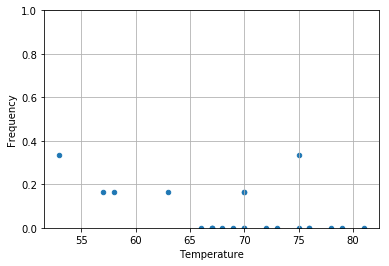

In [17]:
%matplotlib inline
pd.set_option('mode.chained_assignment',None) # this removes a useless warning from pandas
import matplotlib.pyplot as plt

data["Frequency"]=data.Malfunction/data.Count
data.plot(x="Temperature",y="Frequency",kind="scatter",ylim=[0,1])
plt.grid(True)

###  Logistic regression
Let's assume O-rings independently fail with the same probability which solely depends on temperature. A logistic regression should allow us to estimate the influence of temperature.

In [18]:
import statsmodels.api as sm

data["Success"]=data.Count-data.Malfunction
data["Intercept"]=1

logmodel=sm.GLM(data['Frequency'], data[['Intercept','Temperature']], 
                family=sm.families.Binomial(sm.families.links.logit)).fit()

logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Frequency   No. Observations:                   23
Model:                            GLM   Df Residuals:                       21
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3.9210
Date:                Wed, 14 Feb 2024   Deviance:                       3.0144
Time:                        09:42:06   Pearson chi2:                     5.00
No. Iterations:                     6   Covariance Type:             nonrobust
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.0850      7.477      0.680      0.496      -9.570      19.740
Temperature    -0.1156      0.115     -1.004      0.316      -0.341       0.110
===============================================================================
"""

In [19]:
logmodel=sm.GLM(data['Frequency'], data[['Intercept','Temperature']], 
                family=sm.families.Binomial(sm.families.links.logit),
                var_weights=data['Count']).fit()

logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Frequency   No. Observations:                   23
Model:                            GLM   Df Residuals:                       21
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23.526
Date:                Wed, 14 Feb 2024   Deviance:                       18.086
Time:                        09:42:25   Pearson chi2:                     30.0
No. Iterations:                     6   Covariance Type:             nonrobust
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.0850      3.052      1.666      0.096      -0.898      11.068
Temperature    -0.1156      0.047     -2.458      0.014      -0.208      -0.023
===============================================================================
"""

### Predicting failure probability
The temperature when launching the shuttle was 31°F. Let's try to estimate the failure probability for such temperature using our model.:

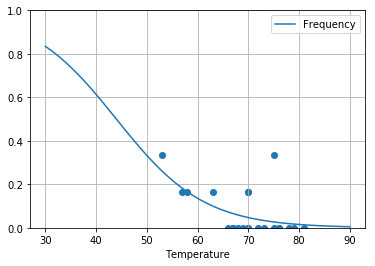

In [20]:
%matplotlib inline
data_pred = pd.DataFrame({'Temperature': np.linspace(start=30, stop=90, num=121), 'Intercept': 1})
data_pred['Frequency'] = logmodel.predict(data_pred)
data_pred.plot(x="Temperature",y="Frequency",kind="line",ylim=[0,1])
plt.scatter(x=data["Temperature"],y=data["Frequency"])
plt.grid(True)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


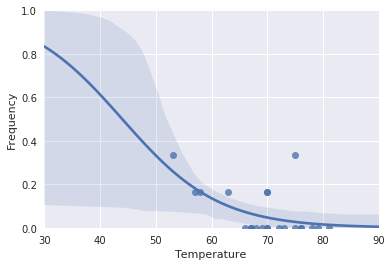

In [21]:
sns.set(color_codes=True)
plt.xlim(30,90)
plt.ylim(0,1)
sns.regplot(x='Temperature', y='Frequency', data=data, logistic=True)
plt.show()